## Background and Objectives

### **Background** <br>
As a Data Scientist, I got a task for solving problem to retrieve all text data from audio recordings (wav). This task could be done manually using human hearing, but it will tooks time. So we need more advanced method to solved this task.

### **Objectives** <br>
Build model for doing Auto Speech Recognition (ASR) using pre-trained model.

## EDA

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
from datasets import load_dataset, Audio

In [3]:
# prompt: code for connect with my google drive
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive/NLP Bootcamp/project-3_speech_recognition')
os.getcwd()

'/content/drive/MyDrive/NLP Bootcamp/project-3_speech_recognition'

In [5]:
ds_minds14 = load_dataset("PolyAI/minds14",'all', split='train', trust_remote_code=True)
train_testvalid = ds_minds14.train_test_split(test_size=0.30)
test_valid = train_testvalid['test'].train_test_split(test_size=0.50)

Generating train split: 0 examples [00:00, ? examples/s]

In [6]:
from datasets import DatasetDict
ds_minds14 = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['train'],
    'valid': test_valid['test']})

ds_minds14

DatasetDict({
    train: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 5717
    })
    test: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 1225
    })
    valid: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 1226
    })
})

In [ ]:
ds_minds14['train'].features

{'path': Value(dtype='string', id=None),
 'audio': Audio(sampling_rate=8000, mono=True, decode=True, id=None),
 'transcription': Value(dtype='string', id=None),
 'english_transcription': Value(dtype='string', id=None),
 'intent_class': ClassLabel(names=['abroad', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposit', 'direct_debit', 'freeze', 'high_value_payment', 'joint_account', 'latest_transactions', 'pay_bill'], id=None),
 'lang_id': ClassLabel(names=['cs-CZ', 'de-DE', 'en-AU', 'en-GB', 'en-US', 'es-ES', 'fr-FR', 'it-IT', 'ko-KR', 'nl-NL', 'pl-PL', 'pt-PT', 'ru-RU', 'zh-CN'], id=None)}

In [10]:
import pandas as pd
intent_class_map = {
    0 : "aboard",
    1 : "address",
    2 : "app_error",
    3 : "atm_limit",
    4 : "balance",
    5 : "business_loan",
    6 : "card_issues",
    7 : "cash_deposite",
    8 : "direct_debit",
    9 : "freeze",
    10: "latest_transactions",
    11: "joint_account",
    12: "high_value_payment",
    13: "pay_bill",
}

lang_id_map = {
    0:'cs-CZ',
    1:'de-DE',
    2:'en-AU',
    3:'en-GB',
    4:'en-US',
    5:'es-ES',
    6:'fr-FR',
    7:'it-IT',
    8:'ko-KR',
    9:'nl-NL',
    10:'pl-PL',
    11:'pt-PT',
    12:'ru-RU',
    13:'zh-CN',
}

df_train = pd.DataFrame.from_dict(ds_minds14['train'])
df_train['intent_class_name'] = df_train.intent_class.replace(intent_class_map)
df_train['lang_id_name'] = df_train.lang_id.replace(lang_id_map)

df_test = pd.DataFrame.from_dict(ds_minds14['test'])
df_test['intent_class_name'] = df_test.intent_class.replace(intent_class_map)
df_test['lang_id_name'] = df_test.lang_id.replace(lang_id_map)

In [ ]:
df_train.head(3)

,path,audio,transcription,english_transcription,intent_class,lang_id,intent_class_name,lang_id_name
0,/root/.cache/huggingface/datasets/downloads/ex...,{'path': '/root/.cache/huggingface/datasets/do...,yes good afternoon could I please grab my acco...,yes good afternoon could I please grab my acco...,4,2,balance,en-AU
1,/root/.cache/huggingface/datasets/downloads/ex...,{'path': '/root/.cache/huggingface/datasets/do...,quelles sont les dernières transactions,what are the latest transactions,12,6,high_value_payment,fr-FR
2,/root/.cache/huggingface/datasets/downloads/ex...,{'path': '/root/.cache/huggingface/datasets/do...,Dzień dobry mam problem z aplikacją Otóż nie m...,"Good morning, I have a problem with the applic...",2,10,app_error,pl-PL


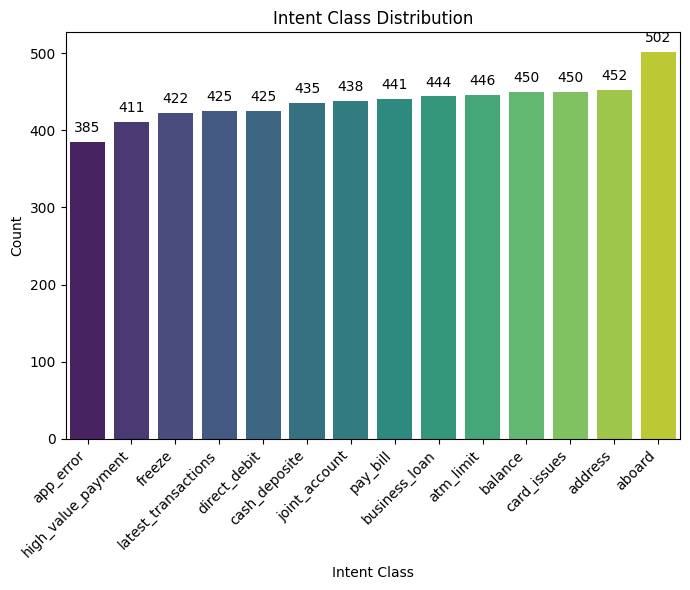

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each intent class
intent_counts = df_train['intent_class_name'].value_counts()

# Sort the intent classes by count in ascending order
sorted_intent_counts = intent_counts.sort_values()

# Create the bar plot
plt.figure(figsize=(7, 6))
ax = sns.barplot(x=sorted_intent_counts.index, y=sorted_intent_counts.values, palette="viridis", hue=sorted_intent_counts.index, legend=False)

# Add data labels to each bar
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Intent Class Distribution')
plt.xlabel("Intent Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


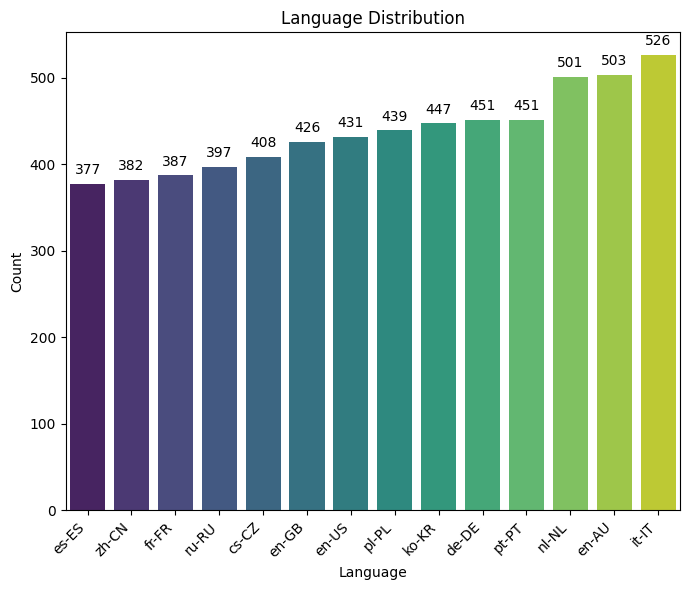

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each intent class
lang_counts = df_train['lang_id_name'].value_counts()

# Sort the intent classes by count in ascending order
lang_counts = lang_counts.sort_values()

# Create the bar plot
plt.figure(figsize=(7, 6))
ax = sns.barplot(x=lang_counts.index, y=lang_counts.values, palette="viridis", hue=lang_counts.index, legend=False)

# Add data labels to each bar
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Language Distribution')
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
pd.concat([df_train[df_train.intent_class_name=='app_error'][['transcription','english_transcription','intent_class_name']].head(3),
df_train[df_train.intent_class_name=='aboard'][['transcription','english_transcription','intent_class_name']].head(3)])

,transcription,english_transcription,intent_class_name
8,hi there I'm trying to use the app to access m...,hi there I'm trying to use the app to access m...,app_error
9,oui bonjour j'aimerais savoir si vous rencontr...,yes hello i would like to know if you are havi...,app_error
26,j'ai un problème avec l'application de la banq...,I have a problem with the bank application it ...,app_error
3,请问我的信用卡可以在国外使用吗,Can my credit card be used abroad,aboard
30,你好我在你们银行办理一张卡然后我想知道他是不是在国外能用我在国外想用我的卡来去便利店呀这种超...,"Hello, I apply for a card at your bank and I w...",aboard
33,Potřebuji zaplatit kartou v Německu Můžu se ze...,I need to pay by card in Germany I can ask,aboard


According to data train (df_train), we can see the intent class distribution which `app_error` intent is the smallest and `aboard` is the largest. Then we also can see from table above of the 3 samples of `app_error` and `aboard` intent.

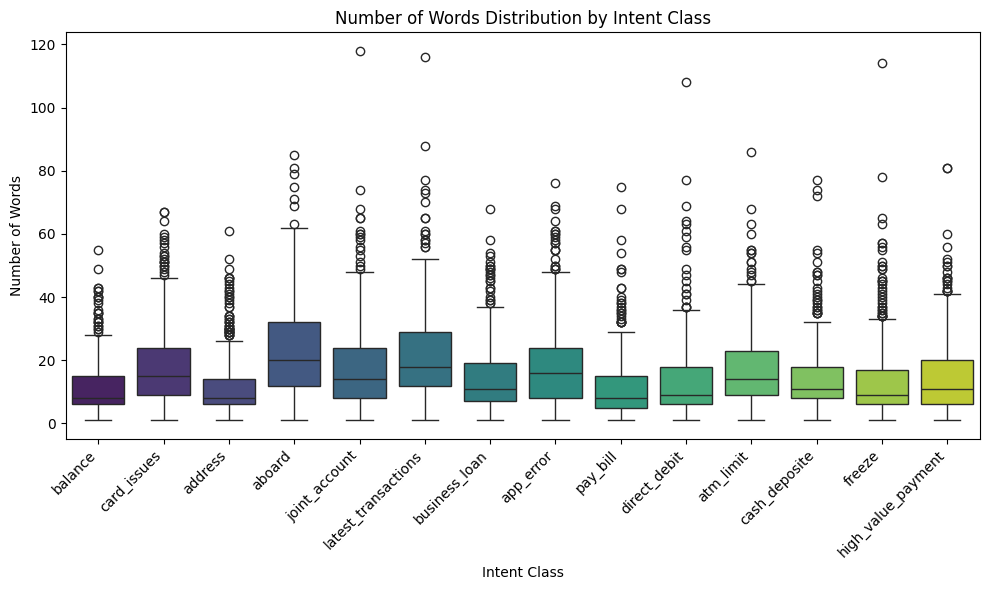

In [ ]:
# prompt: use df_train['transcription'] to visualize a boxplot with x axis is intent class name and value is number of words for each row and intent class name

df_train['num_words'] = df_train['transcription'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.boxplot(x='intent_class_name', y='num_words', data=df_train, palette="viridis",hue='intent_class_name', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Words Distribution by Intent Class')
plt.xlabel('Intent Class')
plt.ylabel('Number of Words')
plt.tight_layout()
plt.show()


In [ ]:
# Show top 3 row that have highest word count
df_train[['transcription','english_transcription','intent_class_name','lang_id_name','num_words']].sort_values(by='num_words', ascending=False).head(3)

,transcription,english_transcription,intent_class_name,lang_id_name,num_words
3585,Hoi Goedemiddag ik zit hier als mijn partner e...,Hi Good afternoon I am sitting here as my part...,joint_account,nl-NL,118
6076,Hey goedemiddag ik loop even vast Ik wil enigs...,Hey good afternoon I get stuck for a while I w...,latest_transactions,nl-NL,116
5299,Goedemiddag ik zit een beetje in de stress Ik ...,Good afternoon I am a bit stressed I hope you ...,freeze,nl-NL,114


In [ ]:
df_pivot = df_train.pivot_table(columns=['lang_id_name'],index=['intent_class_name'],values='lang_id',aggfunc='count').reset_index()
df_pivot.set_index('intent_class_name').style.highlight_max(axis=1, props='color:white; font-weight:bold; background-color:darkblue;')

lang_id_name,cs-CZ,de-DE,en-AU,en-GB,en-US,es-ES,fr-FR,it-IT,ko-KR,nl-NL,pl-PL,pt-PT,ru-RU,zh-CN
intent_class_name,,,,,,,,,,,,,,
aboard,31,40,26,37,28,21,43,55,32,35,32,71,25,26
address,29,37,38,33,21,27,31,44,35,36,37,29,31,24
app_error,29,23,36,34,30,14,20,30,27,41,23,31,23,24
atm_limit,29,36,35,33,32,33,23,42,29,41,29,27,27,30
balance,34,32,40,29,27,34,31,36,30,35,28,30,33,31
business_loan,24,35,34,37,33,35,24,33,34,34,31,30,29,31
card_issues,31,31,35,31,34,26,30,24,40,37,35,30,32,34
cash_deposite,26,31,33,31,33,28,23,44,28,36,35,29,32,26
direct_debit,22,30,40,31,28,30,29,31,30,34,39,25,28,28


In [ ]:
samples_path = {}
for lang in list(df_train['lang_id_name'].unique()):
  samples_path[lang] = {}
  for k,v in enumerate(intent_class_map):
    temp = {}
    audio_path = df_train[(df_train['lang_id_name']==lang) & (df_train['intent_class_name']==intent_class_map[k])].head(1)['path'].values[0]
    temp[intent_class_map[k]] = audio_path
    samples_path[lang] = {**samples_path[lang],**temp}

print(samples_path.keys())
print(samples_path['nl-NL'].keys())

dict_keys(['en-US', 'ko-KR', 'cs-CZ', 'zh-CN', 'en-GB', 'fr-FR', 'de-DE', 'es-ES', 'nl-NL', 'pl-PL', 'pt-PT', 'it-IT', 'en-AU', 'ru-RU'])
dict_keys(['aboard', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposite', 'direct_debit', 'freeze', 'latest_transactions', 'joint_account', 'high_value_payment', 'pay_bill'])


### Waveform Audio Visualization

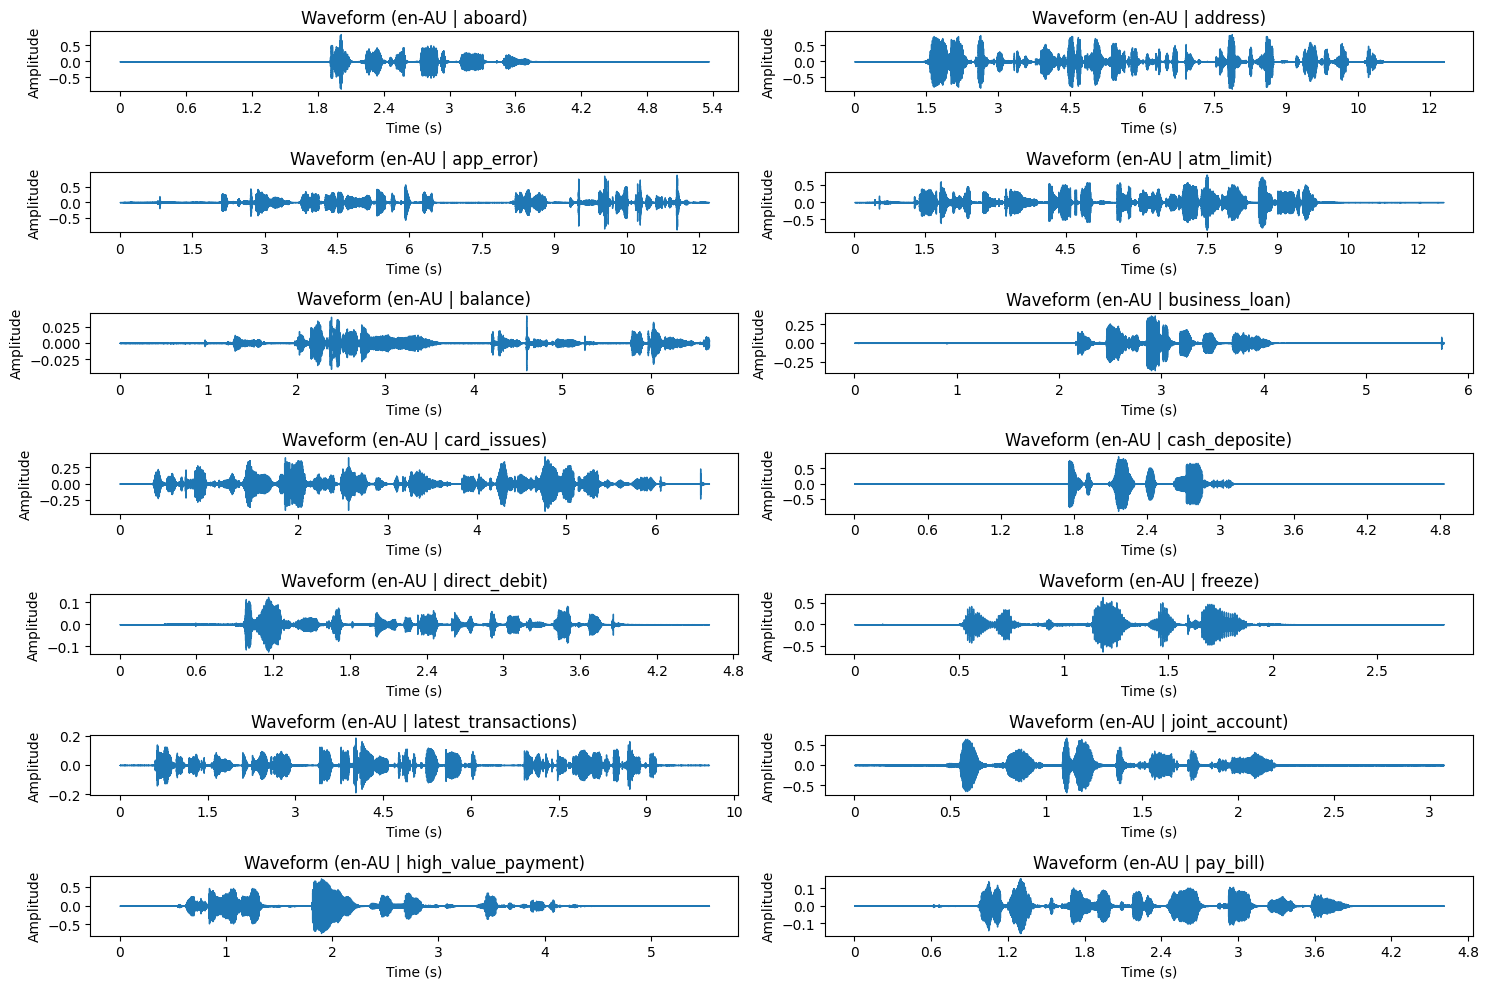

In [ ]:
######################################################
### WAVEFORM FOR EACH INTENT CLASS IN ONE LANGUAGE ###
######################################################

import librosa
fig, ax = plt.subplots(7,2,figsize=(15,10))
ax = ax.flatten()
lang = 'en-AU' ### Language, CHANGE HERE
for i, (k,v) in enumerate(samples_path[lang].items()):
  y, sr = librosa.load(v, sr=None)
  librosa.display.waveshow(y, sr=sr, ax=ax[i])
  ax[i].set_title(f'Waveform ({lang} | {k})')
  ax[i].set_xlabel('Time (s)')
  ax[i].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

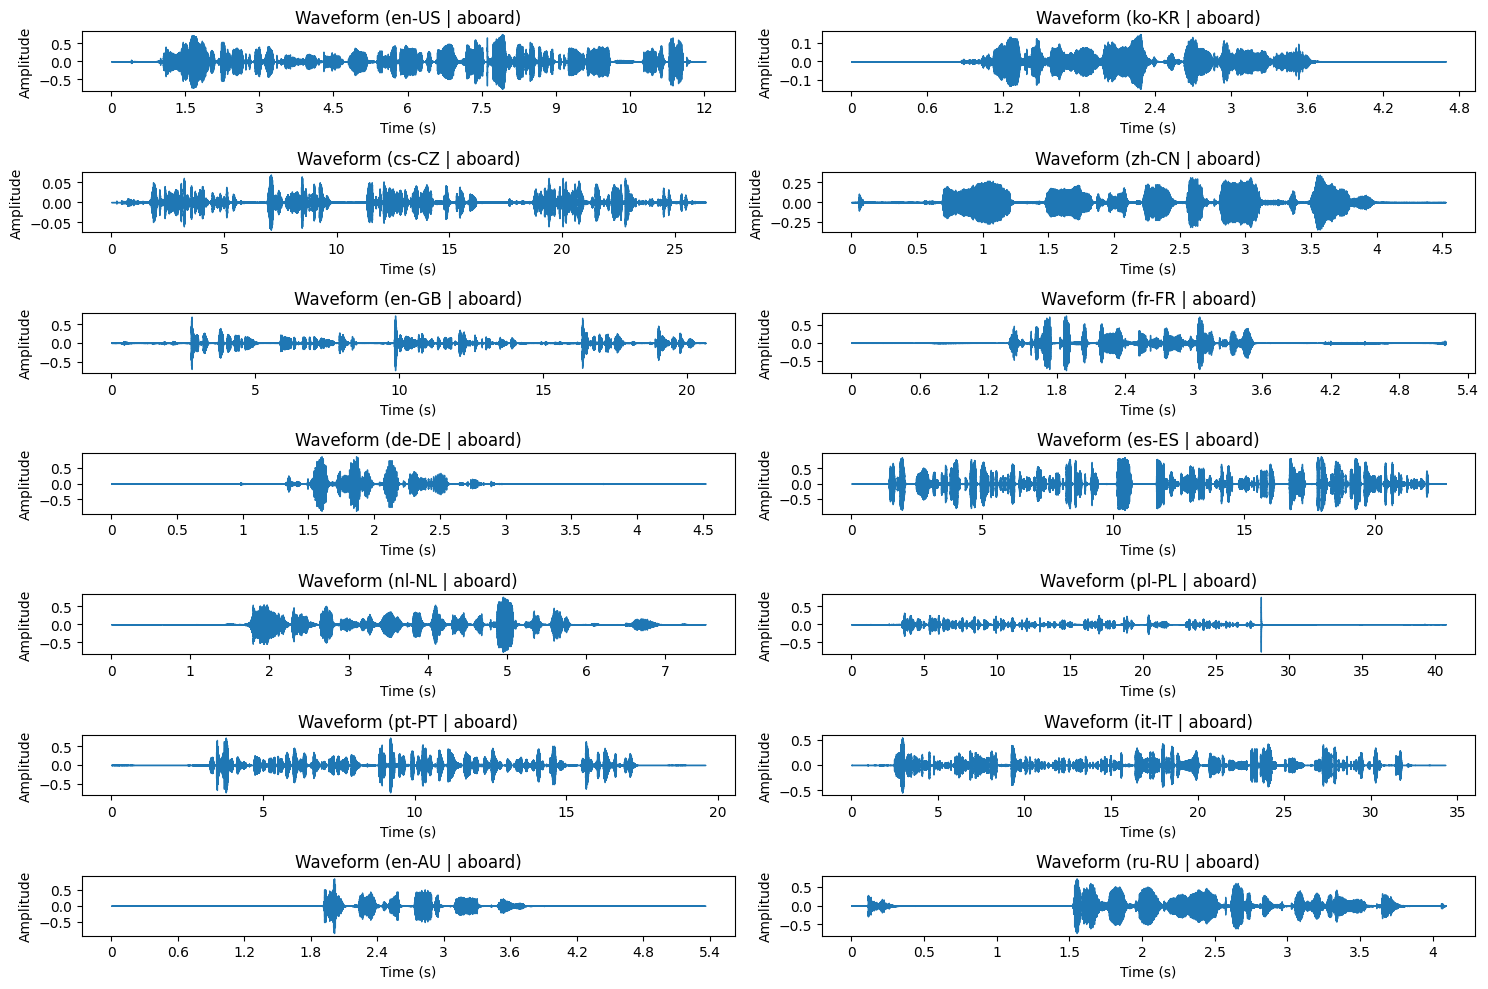

In [ ]:
######################################################
### WAVEFORM FOR EACH LANGUAGE OF ONE INTENT CLASS ###
######################################################

# intents = ['aboard', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposite', 'direct_debit', 'freeze', 'latest_transactions', 'joint_account', 'high_value_payment', 'pay_bill']

import librosa
fig, ax = plt.subplots(7,2,figsize=(15,10))
ax = ax.flatten()
intent = 'aboard' ### Language, CHANGE HERE
for i, (k,v) in enumerate(samples_path.items()):
  y, sr = librosa.load(v[intent], sr=None)
  librosa.display.waveshow(y, sr=sr, ax=ax[i])
  ax[i].set_title(f'Waveform ({k} | {intent})')
  ax[i].set_xlabel('Time (s)')
  ax[i].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import Audio
Audio(samples_path['en-AU']['aboard']) # CHANGE HERE, TO TRY LISTEN THE A SELECTED AUDIO

### Spectogram Audio Visualization

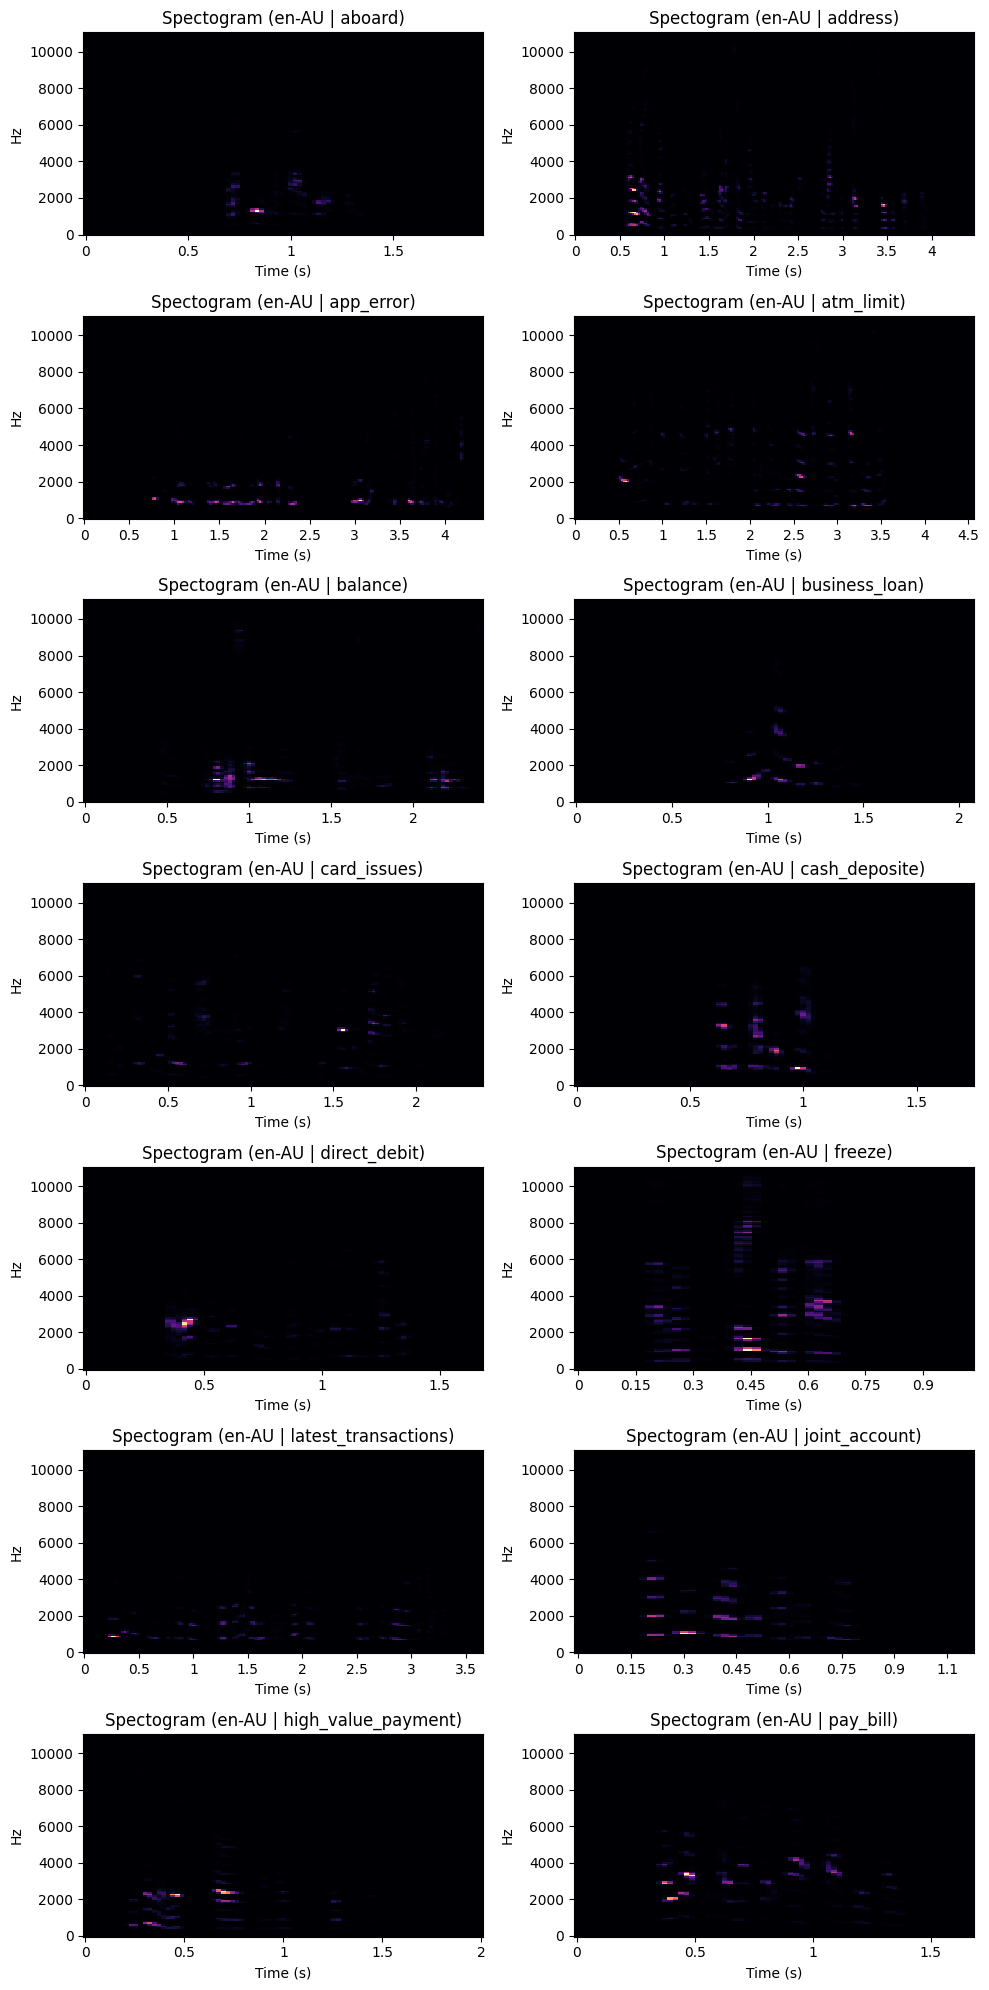

In [ ]:
########################################################
### SPECTOGRAM FOR EACH INTENT CLASS IN ONE LANGUAGE ###
########################################################

import librosa
fig, ax = plt.subplots(7,2,figsize=(10,20))
ax = ax.flatten()
lang = 'en-AU' ### Language, CHANGE HERE
for i, (k,v) in enumerate(samples_path[lang].items()):
  y, sr = librosa.load(v, sr=None) # CHANGE HERE, TO VIEW A SELECTED AUDIO SPECTOGRAM
  spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
  librosa.display.specshow(spectrogram,ax=ax[i], x_axis='time', y_axis='linear')
  ax[i].set_title(f'Spectogram ({lang} | {k})')
  ax[i].set_xlabel('Time (s)')
  ax[i].set_ylabel('Hz')
plt.tight_layout()
plt.show()

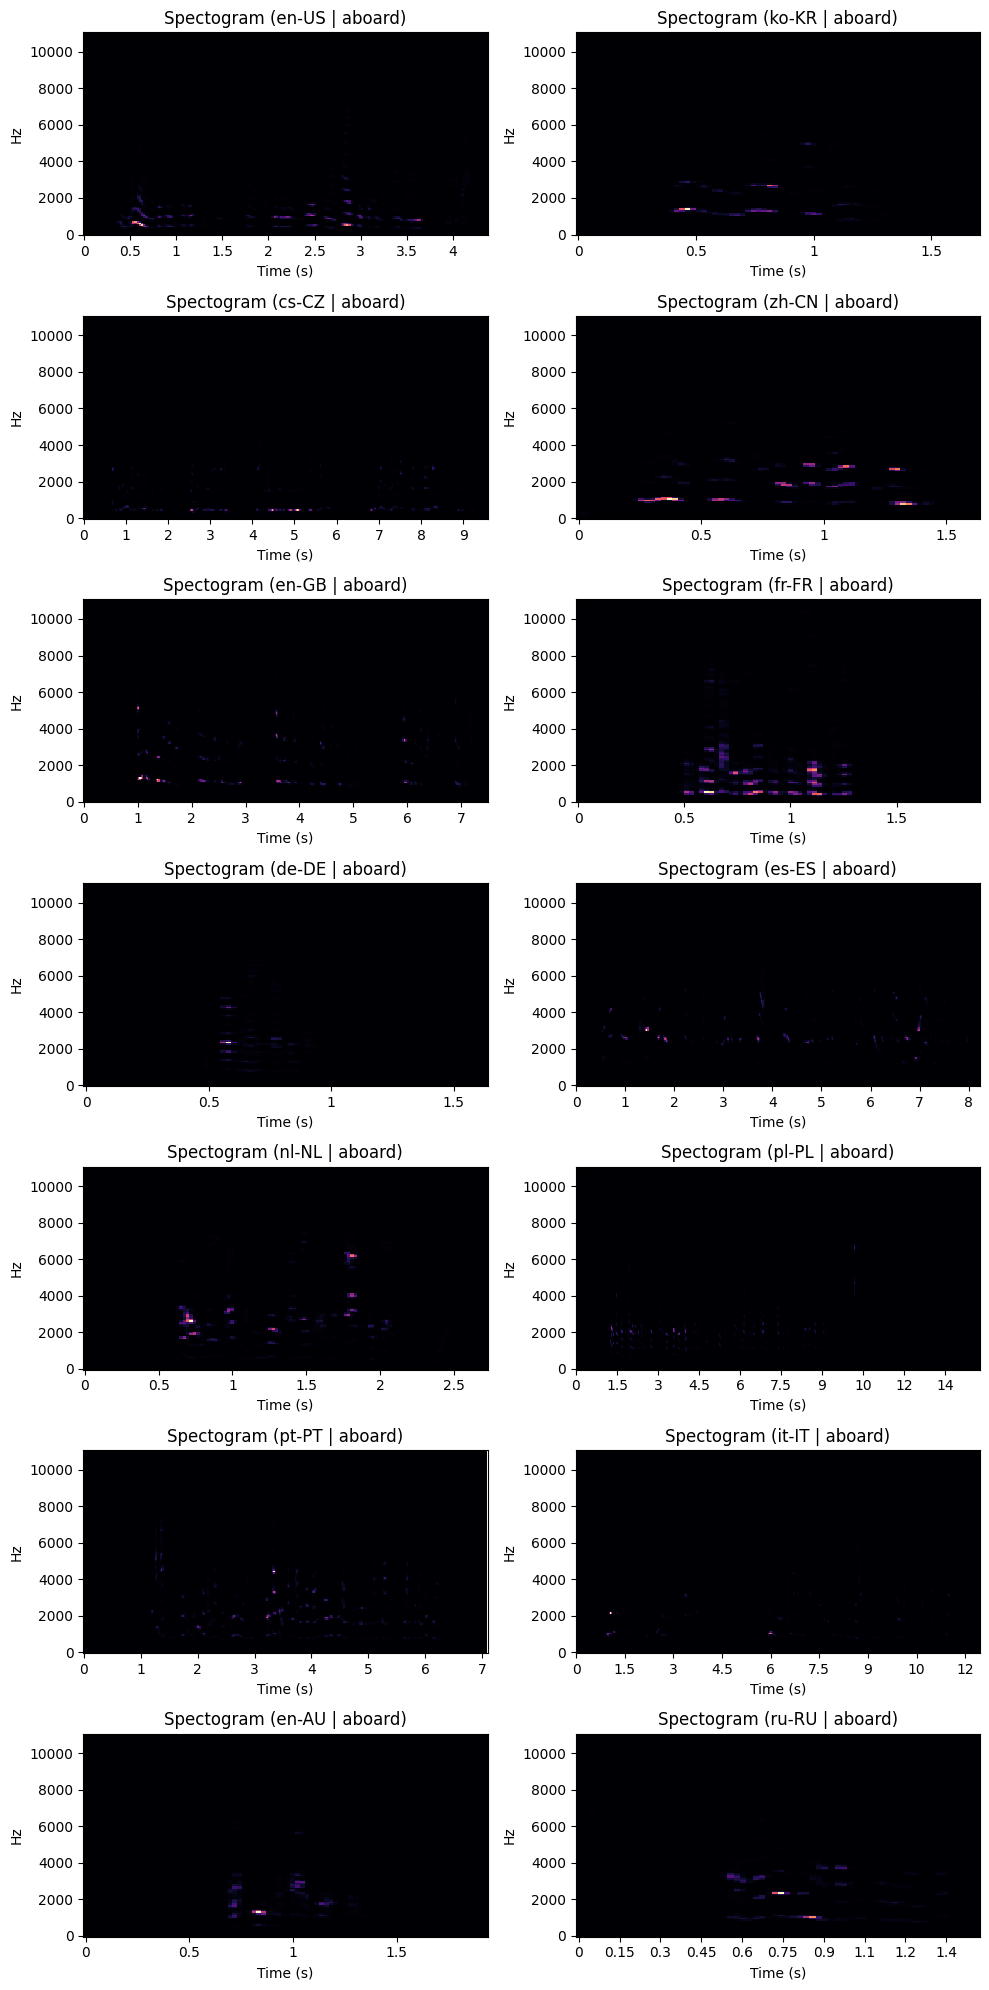

In [ ]:
########################################################
### SPECTOGRAM FOR EACH LANGUAGE OF ONE INTENT CLASS ###
########################################################

# intents = ['aboard', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposite', 'direct_debit', 'freeze', 'latest_transactions', 'joint_account', 'high_value_payment', 'pay_bill']

import librosa
fig, ax = plt.subplots(7,2,figsize=(10,20))
ax = ax.flatten()
intent = 'aboard' ### Language, CHANGE HERE
for i, (k,v) in enumerate(samples_path.items()):
  y, sr = librosa.load(v[intent], sr=None) # CHANGE HERE, TO VIEW A SELECTED AUDIO SPECTOGRAM
  spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
  # spectrogram = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
  librosa.display.specshow(spectrogram,ax=ax[i], x_axis='time', y_axis='linear')
  ax[i].set_title(f'Spectogram ({k} | {intent})')
  ax[i].set_xlabel('Time (s)')
  ax[i].set_ylabel('Hz')
plt.tight_layout()
plt.show()

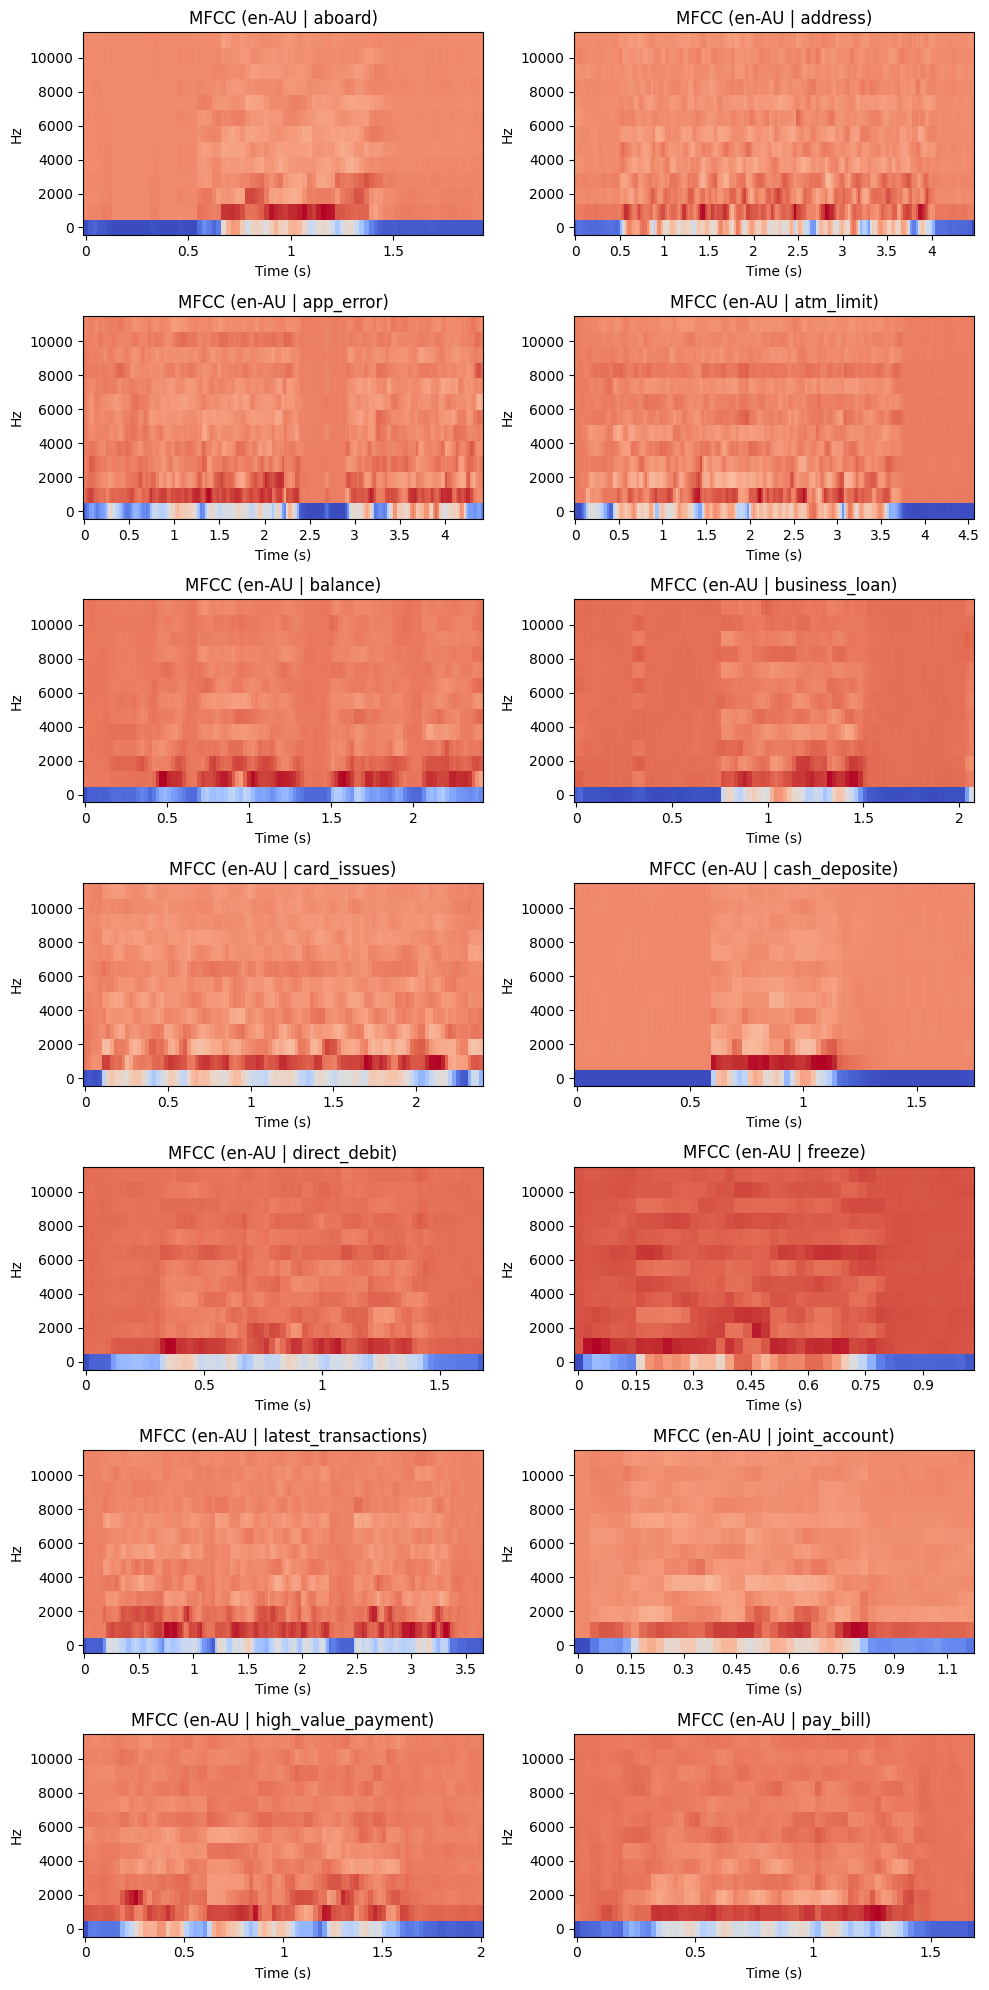

In [ ]:
########################################################
### SPECTOGRAM FOR EACH INTENT CLASS IN ONE LANGUAGE ###
########################################################

import librosa
fig, ax = plt.subplots(7,2,figsize=(10,20))
ax = ax.flatten()
lang = 'en-AU' ### Language, CHANGE HERE
for i, (k,v) in enumerate(samples_path[lang].items()):
  y, sr = librosa.load(v, sr=None) # CHANGE HERE, TO VIEW A SELECTED AUDIO SPECTOGRAM
  # spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
  spectrogram = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
  librosa.display.specshow(spectrogram,ax=ax[i], x_axis='time', y_axis='linear')
  ax[i].set_title(f'MFCC ({lang} | {k})')
  ax[i].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

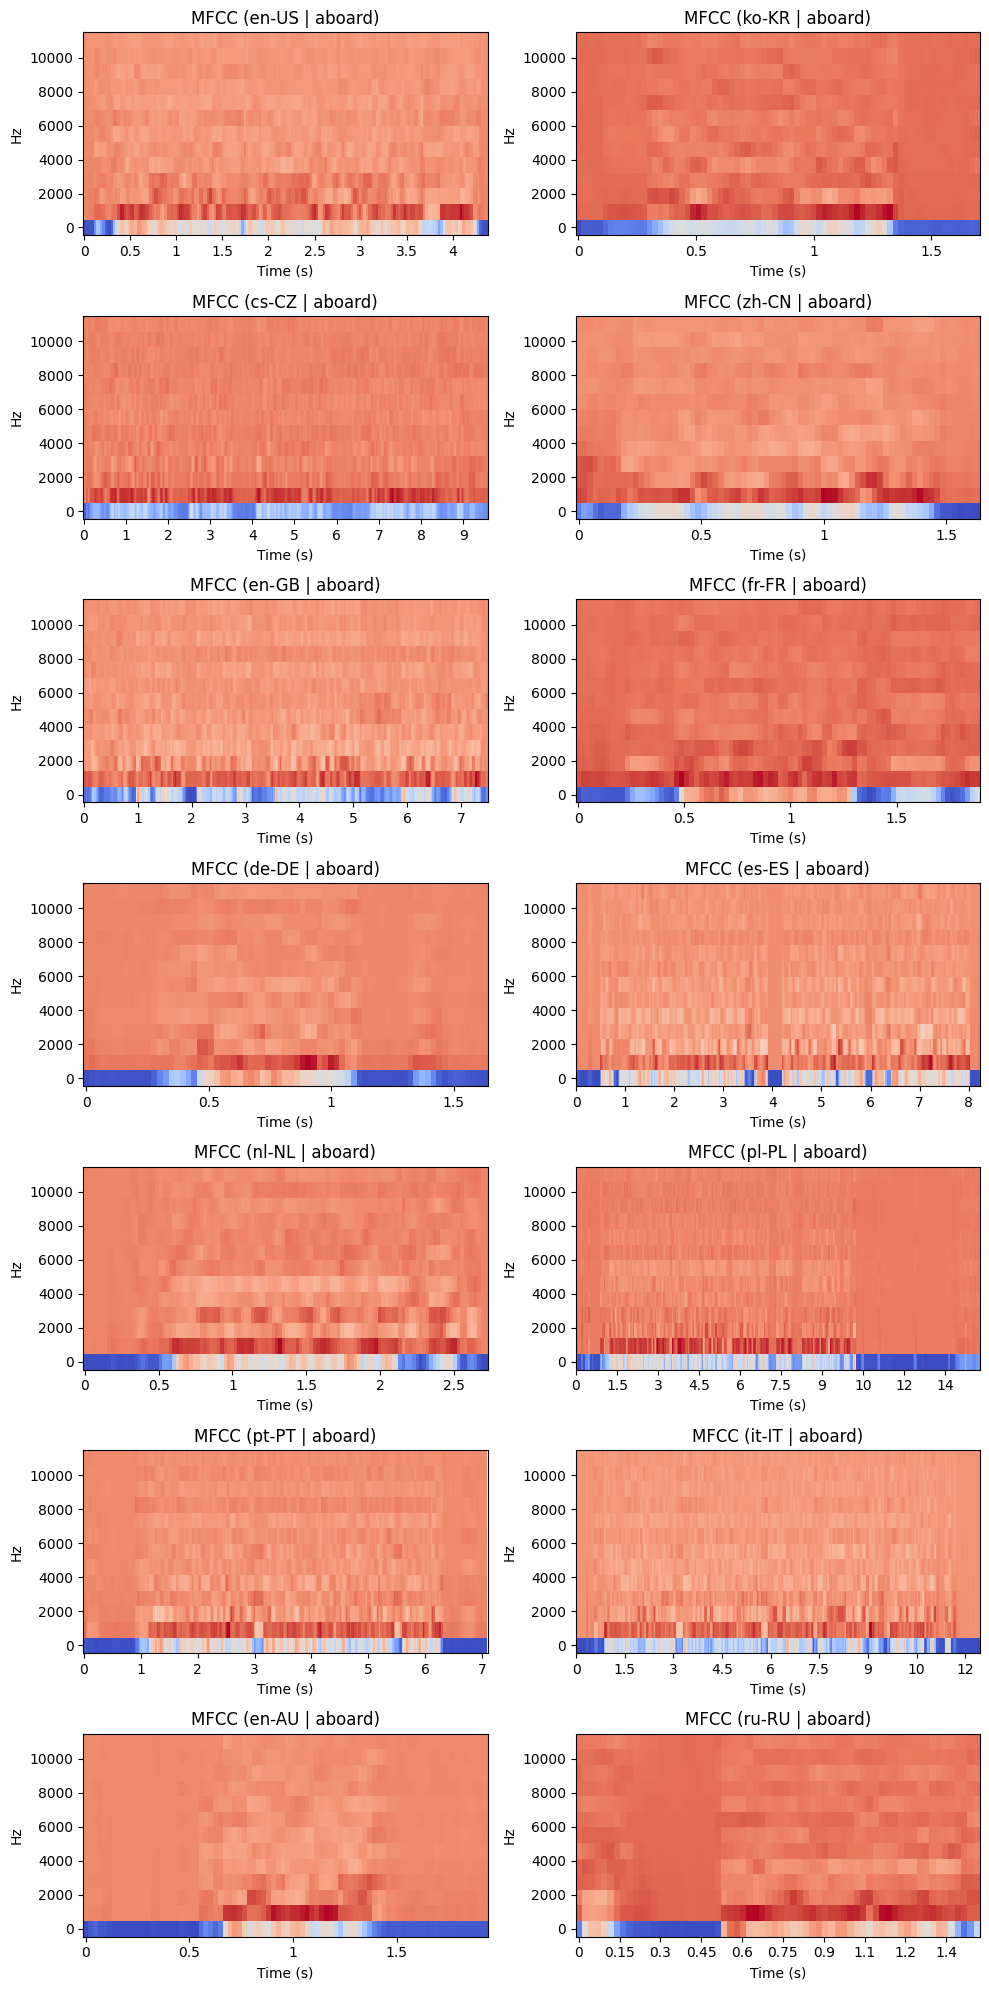

In [ ]:
########################################################
### SPECTOGRAM FOR EACH LANGUAGE OF ONE INTENT CLASS ###
########################################################

# intents = ['aboard', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposite', 'direct_debit', 'freeze', 'latest_transactions', 'joint_account', 'high_value_payment', 'pay_bill']

import librosa
fig, ax = plt.subplots(7,2,figsize=(10,20))
ax = ax.flatten()
intent = 'aboard' ### Language, CHANGE HERE
for i, (k,v) in enumerate(samples_path.items()):
  y, sr = librosa.load(v[intent], sr=None) # CHANGE HERE, TO VIEW A SELECTED AUDIO SPECTOGRAM
  # spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
  spectrogram = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
  librosa.display.specshow(spectrogram,ax=ax[i], x_axis='time', y_axis='linear')
  ax[i].set_title(f'MFCC ({k} | {intent})')
  ax[i].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

## Data Preparation

In [8]:
ds_minds14 # all language

DatasetDict({
    train: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 5717
    })
    test: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 1225
    })
    valid: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 1226
    })
})

In [16]:
ds_minds14_enUS = ds_minds14.filter(lambda x: x['lang_id'] == 4) # filtering data to en-US language as training dataset

In [17]:
ds_minds14_enUS

DatasetDict({
    train: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 400
    })
    test: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 82
    })
    valid: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 81
    })
})

In [19]:
# removing columns
ds_minds14_remcols = ds_minds14_enUS.remove_columns(["english_transcription", "intent_class", "lang_id"])

In [18]:
from transformers import AutoProcessor

# free open source pre-trained model from facebook, we pick the smallest model
processor = AutoProcessor.from_pretrained("facebook/wav2vec2-base")

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:364: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

In [21]:
ds_minds14_train = ds_minds14_remcols['train']
ds_minds14_val = ds_minds14_remcols['valid']
ds_minds14_test = ds_minds14_remcols['test']

In [22]:
import datasets
from datasets import Audio
# since the model sampling_rate is 16,000 so we need to adjust the dataset sampling_rate
ds_minds14_train = ds_minds14_train.cast_column("audio", Audio(sampling_rate=16_000))
ds_minds14_val = ds_minds14_val.cast_column("audio", Audio(sampling_rate=16_000))
ds_minds14_test = ds_minds14_test.cast_column("audio", Audio(sampling_rate=16_000))

In [45]:
def to_upper(example):
    return {"transcription": example["transcription"].upper()}

def to_lower(example):
    return {"transcription": example["transcription"].lower()}

In [46]:
# ds_minds14_train = ds_minds14_train.map(to_upper)
# ds_minds14_val = ds_minds14_val.map(to_upper)
# ds_minds14_test = ds_minds14_test.map(to_upper)

ds_minds14_train = ds_minds14_train.map(to_lower)
ds_minds14_val = ds_minds14_val.map(to_lower)
ds_minds14_test = ds_minds14_test.map(to_lower)

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/81 [00:00<?, ? examples/s]

Map:   0%|          | 0/82 [00:00<?, ? examples/s]

In [61]:
def prepare_dataset(batch):
    audio = batch["audio"]
    batch = processor(audio["array"], sampling_rate=audio["sampling_rate"], text=batch["transcription"])
    batch["input_length"] = len(batch["input_values"][0])
    return batch

In [62]:
encoded_minds14_train = ds_minds14_train.map(prepare_dataset, remove_columns=ds_minds14_train.column_names)
encoded_minds14_val = ds_minds14_val.map(prepare_dataset, remove_columns=ds_minds14_val.column_names)
encoded_minds14_test = ds_minds14_test.map(prepare_dataset, remove_columns=ds_minds14_test.column_names)

## Model Development

In [28]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.1 MB/s eta 0:00:00


In [30]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 35.5 MB/s eta 0:00:00


### Fine Tune Wav2Vec2-base (Trial-1 and Trial-2)

In [63]:
import evaluate

wer_metric = evaluate.load("wer")
cer_metric = evaluate.load("cer")

In [64]:
import numpy as np
def compute_metrics(pred):
    pred_logits = pred.predictions
    pred_ids = np.argmax(pred_logits, axis=-1)

    pred.label_ids[pred.label_ids == -100] = processor.tokenizer.pad_token_id

    pred_str = processor.batch_decode(pred_ids)
    label_str = processor.batch_decode(pred.label_ids, group_tokens=False)

    wer = wer_metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer}

In [66]:
import torch

from dataclasses import dataclass, field
from typing import Any, Dict, List, Optional, Union


@dataclass
class DataCollatorCTCWithPadding:
    processor: AutoProcessor
    padding: Union[bool, str] = "longest"

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lengths and need
        # different padding methods
        input_features = [{"input_values": feature["input_values"][0]} for feature in features]
        label_features = [{"input_ids": feature["labels"]} for feature in features]

        batch = self.processor.pad(input_features, padding=self.padding, return_tensors="pt")

        labels_batch = self.processor.pad(labels=label_features, padding=self.padding, return_tensors="pt")

        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        batch["labels"] = labels

        return batch

In [67]:
data_collator = DataCollatorCTCWithPadding(processor=processor, padding="longest")

In [68]:
# Trial Trancript Sample Audio
from transformers import AutoModelForCTC, TrainingArguments, Trainer

model = AutoModelForCTC.from_pretrained(
    "facebook/wav2vec2-base",
    ctc_loss_reduction="mean",
    pad_token_id=processor.tokenizer.pad_token_id,
)

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:364: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['lm_head.bias', 'lm_head.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [73]:
## transcribed data in upper case

# training_args = TrainingArguments(
#     output_dir="checkpoint_finetuned_wav2vec2_base_lowercase",
#     per_device_train_batch_size=4,
#     per_device_eval_batch_size=4,
#     gradient_accumulation_steps=2,
#     learning_rate=1e-4,
#     warmup_steps=500,
#     max_steps=2500,
#     gradient_checkpointing=True,
#     fp16=True,                               # True only use GPU/ CUDA
#     group_by_length=True,
#     evaluation_strategy="steps",
#     save_steps=500,
#     eval_steps=500,
#     logging_steps=500,
#     load_best_model_at_end=True,
#     metric_for_best_model="wer",
#     greater_is_better=False,
#     push_to_hub=False,
# )

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=encoded_minds14_train,
#     eval_dataset=encoded_minds14_val,
#     tokenizer=processor,
#     data_collator=data_collator,
#     compute_metrics=compute_metrics,
# )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs


In [41]:
# trainer.train() # transcribed data in upper case

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss,Validation Loss,Wer
500,8.463900,3.274406,1.000000
1000,3.203600,3.274322,1.000000
1500,3.193900,3.273104,1.000000
2000,3.196300,3.277304,1.000000
2500,3.193200,3.265606,1.000000


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning

TrainOutput(global_step=2500, training_loss=4.250169384765625, metrics={'train_runtime': 3286.4965, 'train_samples_per_second': 6.086, 'train_steps_per_second': 0.761, 'total_flos': 2.6573247932252314e+18, 'train_loss': 4.250169384765625, 'epoch': 50.0})

In [42]:
# trainer.save_model('model/finetuned_wav2vec2_base_400data_3500maxsteps') # transcribed data in upper case

In [43]:
# trainer.evaluate(encoded_minds14_test) # transcribed data in upper case

{'eval_loss': 3.3054635524749756,
 'eval_wer': 1.0,
 'eval_runtime': 8.1845,
 'eval_samples_per_second': 10.019,
 'eval_steps_per_second': 2.566,
 'epoch': 50.0}

In [ ]:
# transcribed data in lower case

training_args = TrainingArguments(
    output_dir="checkpoint_finetuned_wav2vec2_base_lowercase",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    # gradient_accumulation_steps=2,
    learning_rate=1e-4,
    warmup_steps=200,
    max_steps=3000,
    gradient_checkpointing=True,
    # fp16=True,                               # True only use GPU/ CUDA
    # group_by_length=True,
    evaluation_strategy="steps",
    save_steps=200,
    eval_steps=200,
    logging_steps=200,
    # load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=False,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_minds14_train,
    eval_dataset=encoded_minds14_val,
    tokenizer=processor,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [74]:
trainer.train() # transcribed data in lower case

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss,Validation Loss,Wer
200,0.763700,0.859944,0.949958
400,0.767600,0.801856,0.949958
600,0.780100,0.821052,0.949958
800,0.760000,0.804316,0.949958
1000,0.759900,0.800851,0.949958
1200,0.770400,0.840707,0.949958
1400,0.781400,0.811720,0.949958
1600,0.767700,0.798850,0.949958
1800,0.768600,0.818441,0.949958
2000,0.751300,0.837367,0.949958


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning

TrainOutput(global_step=3000, training_loss=0.7623888092041016, metrics={'train_runtime': 2157.3663, 'train_samples_per_second': 5.562, 'train_steps_per_second': 1.391, 'total_flos': 1.585957781486523e+18, 'train_loss': 0.7623888092041016, 'epoch': 30.0})

In [75]:
trainer.save_model('model/finetuned_wav2vec2_base_400data_3500maxsteps_lowercase')

#### Inferencing With Finetuned Model

In [54]:
from scipy import signal
from scipy.io import wavfile
import IPython.display as ipd

from glob import glob
import seaborn as sns
import pandas as pd

import librosa
import librosa.display

import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from transformers import AutoProcessor
from scipy.fft import fft, fftfreq

from transformers import AutoModelForCTC
from transformers import pipeline

In [76]:
ds_minds14_enUS['test'][0]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f507fdca7f475d961f5bb7093bcc9d544f16f8cab8608e772a2ed4fbeb4d6f50/en-US~ABROAD/602ba090bb1e6d0fbce91fda.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/f507fdca7f475d961f5bb7093bcc9d544f16f8cab8608e772a2ed4fbeb4d6f50/en-US~ABROAD/602ba090bb1e6d0fbce91fda.wav',
  'array': array([ 0.00024414,  0.00024414,  0.        , ..., -0.00024414,
          0.        , -0.00024414]),
  'sampling_rate': 8000},
 'transcription': "hello I will be traveling in Europe next month and I wanted to know if my card was work abroad or if there's anything I need to do in order to set that up",
 'english_transcription': "hello I will be traveling in Europe next month and I wanted to know if my card was work abroad or if there's anything I need to do in order to set that up",
 'intent_class': 0,
 'lang_id': 4}

In [80]:
transcriber = pipeline("automatic-speech-recognition", model="./model/finetuned_wav2vec2_base_400data_3500maxsteps_lowercase") # need directory to config.json file
reference = ds_minds14_enUS['test'][0]['transcription']
predicted =  transcriber(ds_minds14_enUS['test'][0]['path'])['text']

print(f"transcription referece:\n{reference}")
print(f"transcription prediction:\n{predicted}")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


transcription referece:
hello I will be traveling in Europe next month and I wanted to know if my card was work abroad or if there's anything I need to do in order to set that up
transcription prediction:
<unk>


### Fine Tune Wav2Vec2-base (Trial-3)

In [92]:
def extract_all_chars(batch):
  all_text = " ".join(batch["transcription"])
  vocab = list(set(all_text))
  return {"vocab": [vocab], "all_text": [all_text]}

In [93]:
vocabs = ds_minds14_enUS.map(extract_all_chars, batched=True, batch_size=-1, keep_in_memory=True, remove_columns=ds_minds14_enUS['test'].column_names)
# ds_minds14_enUS['test'].column_names

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/82 [00:00<?, ? examples/s]

Map:   0%|          | 0/81 [00:00<?, ? examples/s]

In [94]:
vocabs

DatasetDict({
    train: Dataset({
        features: ['vocab', 'all_text'],
        num_rows: 1
    })
    test: Dataset({
        features: ['vocab', 'all_text'],
        num_rows: 1
    })
    valid: Dataset({
        features: ['vocab', 'all_text'],
        num_rows: 1
    })
})

In [203]:
vocab_list = list(set(vocabs["train"]["vocab"][0]) | set(vocabs["test"]["vocab"][0]))

In [204]:
vocab_dict = {v: k for k, v in enumerate(vocab_list)}
vocab_dict

{'A': 0,
 'R': 1,
 'Y': 2,
 '.': 3,
 'e': 4,
 'd': 5,
 'a': 6,
 'g': 7,
 't': 8,
 'u': 9,
 'K': 10,
 'T': 11,
 'q': 12,
 ' ': 13,
 '8': 14,
 '5': 15,
 '9': 16,
 'f': 17,
 '6': 18,
 '$': 19,
 'y': 20,
 'J': 21,
 'N': 22,
 "'": 23,
 '0': 24,
 'l': 25,
 'p': 26,
 'U': 27,
 'h': 28,
 '1': 29,
 'I': 30,
 'b': 31,
 'j': 32,
 'n': 33,
 'r': 34,
 'i': 35,
 '4': 36,
 '3': 37,
 '-': 38,
 'E': 39,
 'z': 40,
 'F': 41,
 'D': 42,
 'W': 43,
 'H': 44,
 'M': 45,
 's': 46,
 'm': 47,
 'k': 48,
 'v': 49,
 'o': 50,
 'V': 51,
 'S': 52,
 '7': 53,
 'x': 54,
 '2': 55,
 'w': 56,
 'O': 57,
 'P': 58,
 'c': 59,
 'G': 60,
 'C': 61}

In [205]:
# vocab_dict["|"] = vocab_dict[" "]
# del vocab_dict[" "]
vocab_dict["[UNK]"] = len(vocab_dict)
vocab_dict["[PAD]"] = len(vocab_dict)
len(vocab_dict)

64

In [206]:
import json
with open('vocab.json', 'w') as vocab_file:
    json.dump(vocab_dict, vocab_file)

In [207]:
from transformers import Wav2Vec2CTCTokenizer

tokenizer = Wav2Vec2CTCTokenizer("./vocab.json", unk_token="[UNK]", pad_token="[PAD]", word_delimiter_token="|")

In [208]:
from transformers import Wav2Vec2FeatureExtractor

feature_extractor = Wav2Vec2FeatureExtractor(feature_size=1, sampling_rate=16000, padding_value=0.0, do_normalize=True, return_attention_mask=False)

In [209]:
from transformers import Wav2Vec2Processor

processor = Wav2Vec2Processor(feature_extractor=feature_extractor, tokenizer=tokenizer)

In [210]:
ds_minds14_enUS = ds_minds14_enUS.cast_column("audio", Audio(sampling_rate=16_000))

In [211]:
ds_minds14_enUS['train'][0]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f507fdca7f475d961f5bb7093bcc9d544f16f8cab8608e772a2ed4fbeb4d6f50/en-US~BALANCE/602b9874bb1e6d0fbce91f27.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/f507fdca7f475d961f5bb7093bcc9d544f16f8cab8608e772a2ed4fbeb4d6f50/en-US~BALANCE/602b9874bb1e6d0fbce91f27.wav',
  'array': array([-2.66847783e-05, -1.28458036e-04, -2.15888635e-04, ...,
          4.91465500e-04,  1.97514164e-05, -1.62235156e-04]),
  'sampling_rate': 16000},
 'transcription': 'hello I just wanted to know how much money I currently have in my bank account',
 'english_transcription': 'hello I just wanted to know how much money I currently have in my bank account',
 'intent_class': 4,
 'lang_id': 4}

In [212]:
import soundfile as sf

def speech_file_to_array_fn(batch):
    speech_array, sampling_rate = sf.read(batch["audio"]['path'])
    batch["speech"] = speech_array
    batch["sampling_rate"] = batch["audio"]['sampling_rate']
    batch["target_text"] = batch["transcription"]
    return batch

In [213]:
ds_minds14_enUS_trans = ds_minds14_enUS.map(speech_file_to_array_fn, remove_columns=ds_minds14_enUS.column_names['train'], num_proc=4)

/usr/local/lib/python3.10/dist-packages/multiprocess/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Map (num_proc=4):   0%|          | 0/400 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/82 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/81 [00:00<?, ? examples/s]

In [214]:
ds_minds14_enUS_trans

DatasetDict({
    train: Dataset({
        features: ['speech', 'sampling_rate', 'target_text'],
        num_rows: 400
    })
    test: Dataset({
        features: ['speech', 'sampling_rate', 'target_text'],
        num_rows: 82
    })
    valid: Dataset({
        features: ['speech', 'sampling_rate', 'target_text'],
        num_rows: 81
    })
})

In [215]:
ds_minds14_enUS_trans['train'][0]['sampling_rate']

16000

In [216]:
def prepare_dataset(batch):
    # check that all files have the correct sampling rate
    assert (
        len(set(batch["sampling_rate"])) == 1
    ), f"Make sure all inputs have the same sampling rate of {processor.feature_extractor.sampling_rate}."

    batch["input_values"] = processor(batch["speech"], sampling_rate=batch["sampling_rate"][0]).input_values

    with processor.as_target_processor():
        batch["labels"] = processor(batch["target_text"]).input_ids
    return batch

In [217]:
ds_minds14_enUS_prepared = ds_minds14_enUS_trans.map(prepare_dataset, remove_columns=ds_minds14_enUS_trans.column_names["train"], batch_size=8, num_proc=4, batched=True)

Map (num_proc=4):   0%|          | 0/400 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/82 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/81 [00:00<?, ? examples/s]

In [218]:
import torch

from dataclasses import dataclass, field
from typing import Any, Dict, List, Optional, Union

@dataclass
class DataCollatorCTCWithPadding:
    """
    Data collator that will dynamically pad the inputs received.
    Args:
        processor (:class:`~transformers.Wav2Vec2Processor`)
            The processor used for proccessing the data.
        padding (:obj:`bool`, :obj:`str` or :class:`~transformers.tokenization_utils_base.PaddingStrategy`, `optional`, defaults to :obj:`True`):
            Select a strategy to pad the returned sequences (according to the model's padding side and padding index)
            among:
            * :obj:`True` or :obj:`'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
              sequence if provided).
            * :obj:`'max_length'`: Pad to a maximum length specified with the argument :obj:`max_length` or to the
              maximum acceptable input length for the model if that argument is not provided.
            * :obj:`False` or :obj:`'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of
              different lengths).
        max_length (:obj:`int`, `optional`):
            Maximum length of the ``input_values`` of the returned list and optionally padding length (see above).
        max_length_labels (:obj:`int`, `optional`):
            Maximum length of the ``labels`` returned list and optionally padding length (see above).
        pad_to_multiple_of (:obj:`int`, `optional`):
            If set will pad the sequence to a multiple of the provided value.
            This is especially useful to enable the use of Tensor Cores on NVIDIA hardware with compute capability >=
            7.5 (Volta).
    """

    processor: Wav2Vec2Processor
    padding: Union[bool, str] = True
    max_length: Optional[int] = None
    max_length_labels: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    pad_to_multiple_of_labels: Optional[int] = None

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lenghts and need
        # different padding methods
        input_features = [{"input_values": feature["input_values"]} for feature in features]
        label_features = [{"input_ids": feature["labels"]} for feature in features]

        batch = self.processor.pad(
            input_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        with self.processor.as_target_processor():
            labels_batch = self.processor.pad(
                label_features,
                padding=self.padding,
                max_length=self.max_length_labels,
                pad_to_multiple_of=self.pad_to_multiple_of_labels,
                return_tensors="pt",
            )

        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        batch["labels"] = labels

        return batch

In [219]:
data_collator = DataCollatorCTCWithPadding(processor=processor, padding=True)

In [220]:
from datasets import load_metric
wer_metric = load_metric("wer")

In [221]:
def compute_metrics(pred):
    pred_logits = pred.predictions
    pred_ids = np.argmax(pred_logits, axis=-1)

    pred.label_ids[pred.label_ids == -100] = processor.tokenizer.pad_token_id

    pred_str = processor.batch_decode(pred_ids)
    # we do not want to group tokens when computing the metrics
    label_str = processor.batch_decode(pred.label_ids, group_tokens=False)

    wer = wer_metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer}

In [227]:
from transformers import Wav2Vec2ForCTC

model = Wav2Vec2ForCTC.from_pretrained(
    "facebook/wav2vec2-base",
    gradient_checkpointing=True,
    ctc_loss_reduction="mean",
    pad_token_id=processor.tokenizer.pad_token_id,
    vocab_size=len(processor.tokenizer)
)

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:364: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['lm_head.bias', 'lm_head.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [228]:
tokenizer

Wav2Vec2CTCTokenizer(name_or_path='', vocab_size=64, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '[UNK]', 'pad_token': '[PAD]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	62: AddedToken("[UNK]", rstrip=True, lstrip=True, single_word=False, normalized=False, special=False),
	63: AddedToken("[PAD]", rstrip=True, lstrip=True, single_word=False, normalized=False, special=False),
	64: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	65: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [223]:
model.config.update({
    "vocab_size": len(tokenizer),
})

In [224]:
model.freeze_feature_extractor()

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/modeling_wav2vec2.py:2284: FutureWarning: The method `freeze_feature_extractor` is deprecated and will be removed in Transformers v5. Please use the equivalent `freeze_feature_encoder` method instead.
  warnings.warn(


In [229]:
from transformers import Trainer
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./checkpoint_finetuned_wav2vec2_base_custom",
  group_by_length=True,
  per_device_train_batch_size=4,
  eval_strategy="steps",
  num_train_epochs=30,
  fp16=True,
  save_steps=500,
  eval_steps=500,
  logging_steps=500,
  learning_rate=1e-4,
  weight_decay=0.005,
  warmup_steps=1000,
  save_total_limit=2,
)

trainer = Trainer(
    model=model,
    data_collator=data_collator,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=ds_minds14_enUS_prepared["train"],
    eval_dataset=ds_minds14_enUS_prepared["valid"],
    tokenizer=processor.feature_extractor,
)

In [230]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:157: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(


Step,Training Loss,Validation Loss,Wer
500,4.735900,4.476261,1.000000
1000,3.117900,3.566426,1.000000
1500,2.825400,2.795122,1.000000
2000,2.061000,2.400018,1.000000
2500,1.430100,2.223202,1.000000
3000,1.107300,2.256636,1.000000


/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:157: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:157: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:157: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call

TrainOutput(global_step=3000, training_loss=2.546280476888021, metrics={'train_runtime': 924.2726, 'train_samples_per_second': 12.983, 'train_steps_per_second': 3.246, 'total_flos': 4.9372021790550976e+17, 'train_loss': 2.546280476888021, 'epoch': 30.0})

In [234]:
trainer.save_model('finetuned_wav2vec2_base_custom')

In [237]:
tokenizer.save_pretrained('finetuned_wav2vec2_base_custom')

('finetuned_wav2vec2_base_custom/tokenizer_config.json',
 'finetuned_wav2vec2_base_custom/special_tokens_map.json',
 'finetuned_wav2vec2_base_custom/vocab.json',
 'finetuned_wav2vec2_base_custom/added_tokens.json')

In [238]:
processor = Wav2Vec2Processor.from_pretrained("./finetuned_wav2vec2_base_custom")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [239]:
model = Wav2Vec2ForCTC.from_pretrained("./finetuned_wav2vec2_base_custom")

In [245]:
def map_to_result(batch):
  model.to("cuda")
  input_values = processor(
      batch["audio"]['array'],
      sampling_rate=batch["audio"]["sampling_rate"],
      return_tensors="pt"
  ).input_values.to("cuda")

  with torch.no_grad():
    logits = model(input_values).logits

  pred_ids = torch.argmax(logits, dim=-1)
  batch["pred_str"] = processor.batch_decode(pred_ids)[0]

  return batch

In [244]:
ds_minds14_enUS['test']['audio'][0]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f507fdca7f475d961f5bb7093bcc9d544f16f8cab8608e772a2ed4fbeb4d6f50/en-US~ABROAD/602ba090bb1e6d0fbce91fda.wav',
 'array': array([ 0.00022479,  0.00027571,  0.00026427, ..., -0.00011977,
        -0.00023224, -0.00017532]),
 'sampling_rate': 16000}

In [246]:
results = ds_minds14_enUS['test'].map(map_to_result)

Parameter 'function'=<function map_to_result at 0x7e177a8f2200> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/82 [00:00<?, ? examples/s]

In [247]:
results

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id', 'pred_str'],
    num_rows: 82
})

In [249]:
print("Test WER: {:.3f}".format(wer_metric.compute(predictions=results["pred_str"], references=results["transcription"])))

Test WER: 1.000


In [250]:
from datasets import ClassLabel
import random
import pandas as pd
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    display(HTML(df.to_html()))

In [251]:
show_random_elements(results.remove_columns(['path', 'audio','english_transcription', 'intent_class', 'lang_id',]))

,transcription,pred_str
0,what are my options to deposit money into my account,hin[UNK]h[UNK]aen[UNK]oing[UNK]ou[UNK]in[UNK][UNK]on[UNK]
1,I'm interested in information on a new getting a new business loan,ha[UNK]coes[UNK]opol[UNK]ain[UNK]aastat
2,teach me how to pay bill online,[UNK]toe[UNK]hau[UNK]oa[UNK]crn[UNK]b[UNK]ansad
3,make a bill payment,ya[UNK][UNK]par[UNK]on
4,brayon I recently and I just want to know if it's almost out of work I'm going north and going to be in different countries in different countries one if it's a different word,h[UNK][UNK]o[UNK][UNK]o[UNK][UNK]
5,please show me my last five transactions,ar[UNK]try'm[UNK]o[UNK]ant[UNK]ad[UNK]caolin[UNK]baolaun[UNK]cto
6,hi I'm going on vacation in a couple of weeks and I just want to know if there's anything I need to do for my card to make sure it doesn't get declined while I'm abroad,hI'ma[UNK][UNK]toupn[UNK]o[UNK]f[UNK]n[UNK]mnl[UNK][UNK]u[UNK]noan
7,hi good afternoon can you help me with my card I'm having trouble I'm here at 9 to use my card but it won't work it will not make a payment here tell me what's wrong with this please,I[UNK]o[UNK]o[UNK][UNK]pan[UNK]ham[UNK]co[UNK]ng[UNK]a[UNK]trinnn[UNK]ano[UNK]oc[UNK]nn[UNK][UNK]ctayn[UNK][UNK]t
8,hey some dude got a hold of my car and I want fries all transactions on that,I[UNK]tn[UNK]an[UNK][UNK]a[UNK]cling[UNK]bnnt
9,what is my ATM withdrawal limit,h[UNK]a[UNK]I[UNK]ant[UNK]qula[UNK]m


## Discussion

According to Trial 1, 2, and 3, these result still meet unsatisfied result. For the future works, it is recommended to use another ASR (Automatic Speech Recognition) pre-trained model like Whisper.